<a href="https://colab.research.google.com/github/woonkirov/section-1-project/blob/main/AI_07_%EC%9D%B4%EA%B8%B0%ED%95%9C_Section_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#지역별 장르 선호도
#연도별 게임 트렌드
#출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [2]:
import pandas as pd

df = pd.read_csv('vgames2.csv', index_col = 0)

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [4]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [5]:
df.NA_Sales.unique()

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '1.93',
       '0.29', '0.19', '0.3', '0.26', '0.11', '0.18', '0.33', '0.51',
       '60K', '0.13', '0.52', '0.34', '0.25', '0.41', '0.22', '0.35',
       '0.1', '0.67', '0.59', '0.36', '0.21', '1.19', '5.91', '1.98',
       '0.09', '0K', '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23',
       '0.44', '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49',
       '0.62', '0.24', '0.72', '1.74', '0.46', '0.65', '0.32', '1.53',
       '0.23', '0.53', '0.37', '1.26', '0.39', '0.58', '1.94', '2.31',
       '1.03', '0.82', '0.4', '0.93', '0.56', '0.96', '1.64', '0.69',
       '1.25', '0.27', '0.92', '0.58M', '1.24', '0.25M', '0.86', '0.73',
       '0.55', '1.54', '1.02', '1.27', '0.54', '0.15', '1.09', '3.44',
       '2.29', '0.88', '5.55M', '1.37', '2.3', '0.99', '1.15', '0.98',
       '0.75', '0.74', '0.7', '0.14M', '0.45', '1.2', '1.41', '0.68',
       '

In [6]:
def del_M(x):
  return x.replace('M', '')

def del_K(x):
  return float(x.replace('K', '000'))

def ktom(x):
  if x >= 1000:
    return x / 1000000
  elif x < 1000:
    return x

df['NA_Sales'] = df['NA_Sales'].apply(del_M).apply(del_K).apply(ktom)
df['EU_Sales'] = df['EU_Sales'].apply(del_M).apply(del_K).apply(ktom)
df['JP_Sales'] = df['JP_Sales'].apply(del_M).apply(del_K).apply(ktom)
df['Other_Sales'] = df['Other_Sales'].apply(del_M).apply(del_K).apply(ktom)

In [7]:
df['Pop_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Pop_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [8]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
Pop_Sales      float64
dtype: object

In [9]:
# 지역별 장르 선호도 df1
# 장르별 지역 판매량 합계
df1 = df.drop(['Name', 'Platform', 'Year',	'Publisher'], axis = 1).dropna()
df1 = df1.groupby(df1['Genre'])
df1 = df1.sum()
df1

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Pop_Sales
Genre,,,,,
Action,874.81,522.16,157.90,186.45,1741.32
Adventure,105.66,64.05,51.95,16.81,238.47
Fighting,223.20,101.22,87.34,36.64,448.40
Misc,408.05,212.36,105.27,74.04,799.72
Platform,446.44,201.61,130.65,51.53,830.23
Puzzle,123.35,50.73,56.87,12.52,243.47
Racing,357.19,237.10,56.40,77.10,727.79
Role-Playing,319.54,183.58,344.95,56.96,905.03
Shooter,581.92,313.05,38.28,102.65,1035.90


In [10]:
df1['Other_Sales'].sort_values(ascending = False)

Genre
Action          186.45
Sports          134.67
Shooter         102.65
Racing           77.10
Misc             74.04
Role-Playing     56.96
Platform         51.53
Fighting         36.64
Simulation       31.48
Adventure        16.81
Puzzle           12.52
Strategy         11.36
Name: Other_Sales, dtype: float64

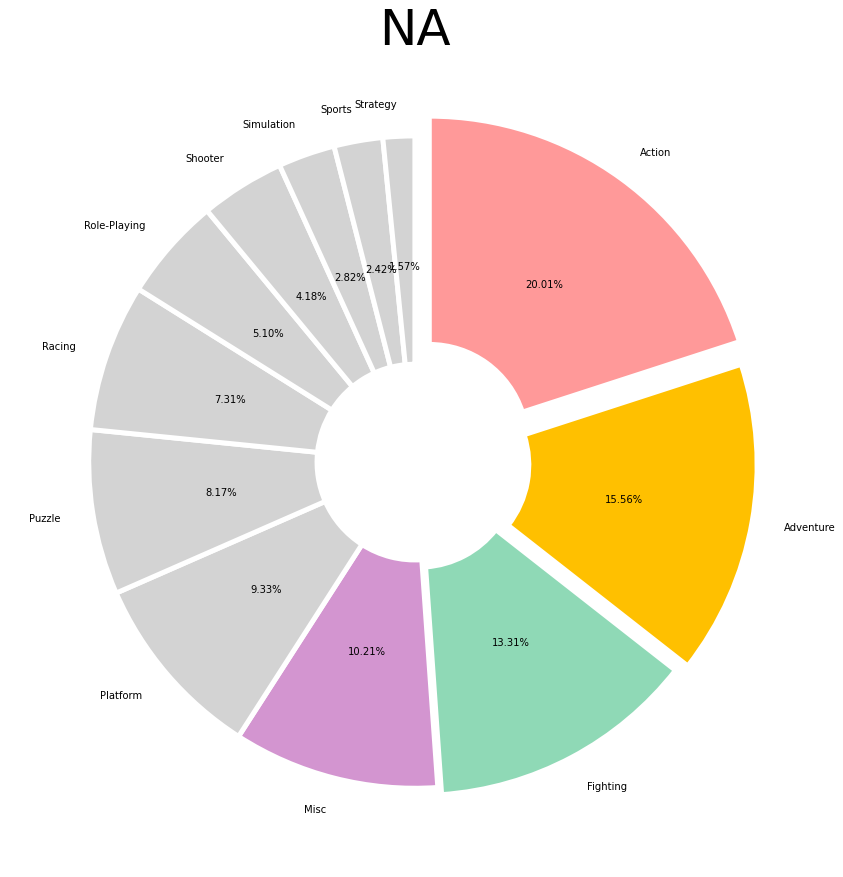

In [11]:
import matplotlib.pyplot as plt

explode = [0.075, 0.05, 0.025, 0, 0, 0, 0, 0, 0, 0, 0, 0]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

fig = plt.figure(figsize = (15, 15))
plt.pie(df1['NA_Sales'].sort_values(ascending = False),
        labels = df1.index, 
        autopct='%.2f%%',
        counterclock = False,
        startangle = 90,
        explode = explode, 
        colors = colors,
        wedgeprops = wedgeprops)

plt.title('NA', fontsize = 50)
plt.show()

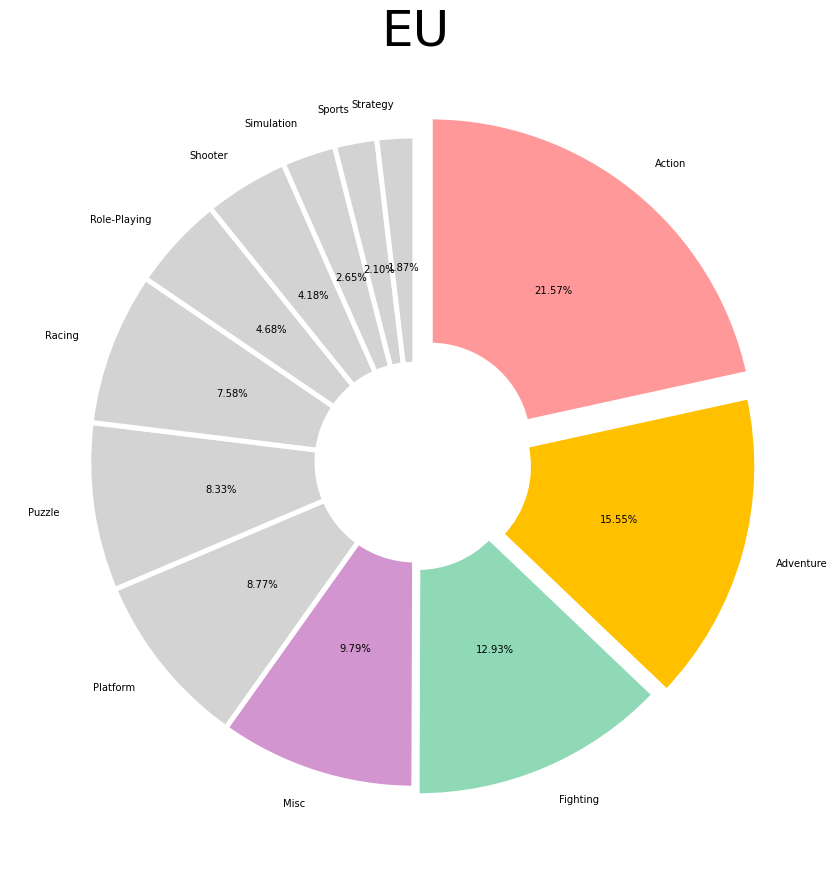

In [12]:
fig = plt.figure(figsize = (15, 15))
plt.pie(df1['EU_Sales'].sort_values(ascending = False),
        labels = df1.index, 
        autopct='%.2f%%',
        counterclock = False,
        startangle = 90,
        explode = explode, 
        colors = colors,
        wedgeprops = wedgeprops)

plt.title('EU', fontsize = 50)
plt.show()

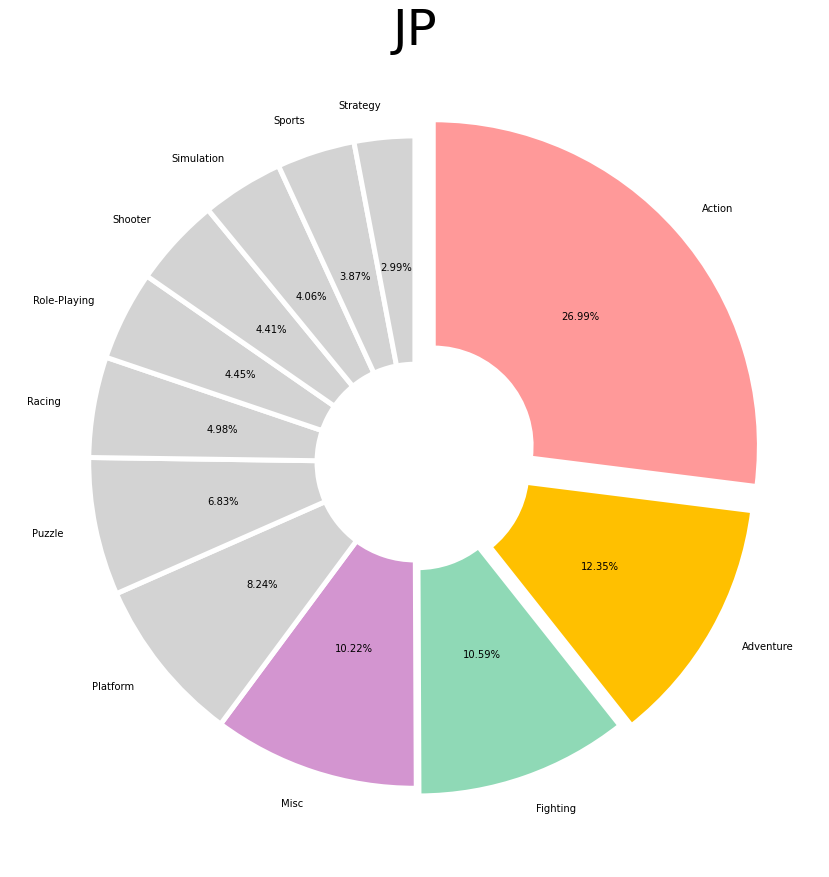

In [13]:
fig = plt.figure(figsize = (15, 15))
plt.pie(df1['JP_Sales'].sort_values(ascending = False),
        labels = df1.index, 
        autopct='%.2f%%',
        counterclock = False,
        startangle = 90,
        explode = explode, 
        colors = colors,
        wedgeprops = wedgeprops)

plt.title('JP', fontsize = 50)
plt.show()

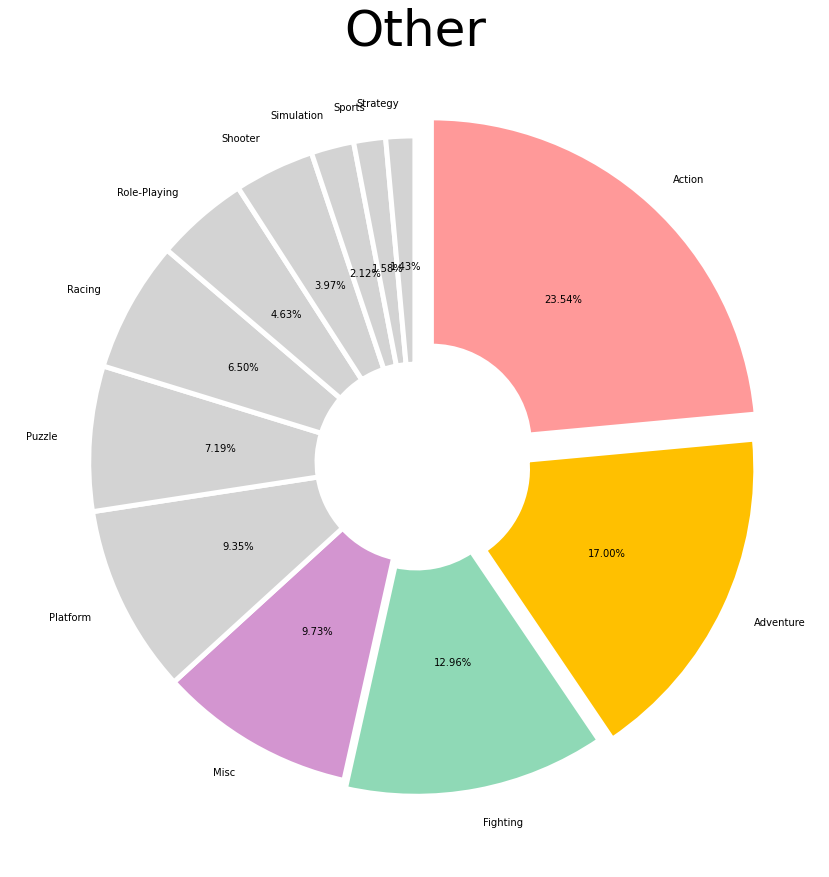

In [14]:
fig = plt.figure(figsize = (15, 15))
plt.pie(df1['Other_Sales'].sort_values(ascending = False),
        labels = df1.index, 
        autopct='%.2f%%',
        counterclock = False,
        startangle = 90,
        explode = explode, 
        colors = colors,
        wedgeprops = wedgeprops)

plt.title('Other', fontsize = 50)
plt.show()

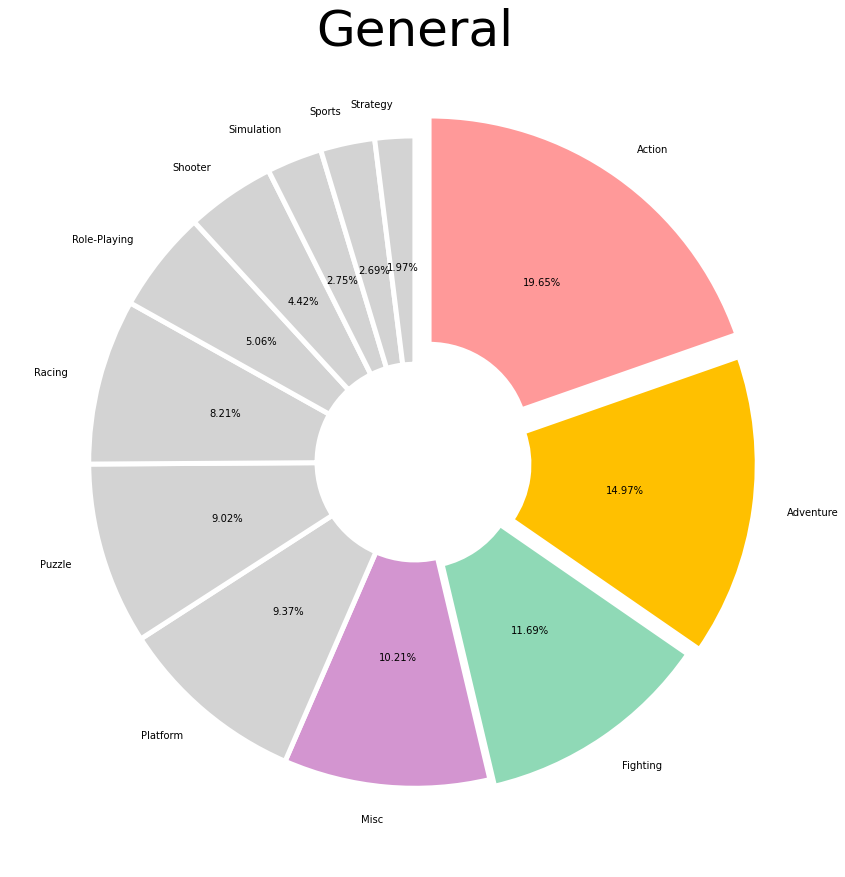

In [15]:
fig = plt.figure(figsize = (15, 15))
plt.pie(df1['Pop_Sales'].sort_values(ascending = False),
        labels = df1.index, 
        autopct='%.2f%%',
        counterclock = False,
        startangle = 90,
        explode = explode, 
        colors = colors,
        wedgeprops = wedgeprops)

plt.title('General', fontsize = 50)
plt.show()

In [16]:
#지역별 장르 선호도
#모든 지역에서 약간의 차이는 있지만 액션, 모험, 격투 순으로 장르를 선호한다.

In [22]:
df2 = df.drop(['Name', 'Platform', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis = 1).dropna()
df2

,Year,Genre,Pop_Sales
1,2008.0,Action,0.04
2,2009.0,Action,0.18
3,2010.0,Adventure,0.02
4,2010.0,Misc,0.04
5,2010.0,Platform,0.25
...,...,...,...
16594,2006.0,Platform,0.20
16595,2005.0,Action,0.01
16596,2015.0,Sports,0.79
16597,2013.0,Action,0.38


In [28]:
def toint(year):
  return int(year)

df2['Year'] = df2['Year'].apply(toint)
df2

,Year,Genre,Pop_Sales
1,2008,Action,0.04
2,2009,Action,0.18
3,2010,Adventure,0.02
4,2010,Misc,0.04
5,2010,Platform,0.25
...,...,...,...
16594,2006,Platform,0.20
16595,2005,Action,0.01
16596,2015,Sports,0.79
16597,2013,Action,0.38


In [29]:
df2['Year'].sort_values().unique()

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   86,   94,   95,   96,   97,
         98, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2020])